In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

df_davis = pd.read_csv("davis_grace_female___.csv")
df_bed = pd.read_csv("bedTimeHours.csv", header=None)
df_day = pd.read_csv("dayCaffeine.csv", header=None)
df_gender = pd.read_csv("gender.csv").T
df_awake = pd.read_csv("minsAwake.csv", header=None)
df_nap = pd.read_csv("minutesNap.csv", header=None)
df_night = pd.read_csv("nightCaffeine.csv", header=None)
df_section = pd.read_csv("section.csv", header=None).T
df_ssi = pd.read_csv("SSI.csv", header=None)
df_sleep = pd.read_csv("toSleepMinutes.csv", header=None)
df_alarm = pd.read_csv("useAlarm.csv", header=None)
df_wake = pd.read_csv("wakeHours.csv", header=None)
df_hoursinbed = pd.read_csv("HoursinBed_.csv", header=None) #wake-up minus bed-time in hours
df_totalhoursslept = pd.read_csv("TotalHoursSlept.csv", header=None) #(hours in bed + hours napping - hours to sleep - hours awake)

In [3]:
#2. My info
df_davis.describe()

,"Day caffeine? (1 = Yes, 0 = No)","Night caffeine? (1 = Yes, 0 = No)",Hours of day napping,Minutes to fall asleep,Bedtime(24-hourtime),Wakeup_time(24 -hour time),"Alarm? (1 = Yes, 0 = No)",minutes awakened during night,SSI,Total Hours Slept
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.380952,0.142857,0.285714,14.761905,0.892857,9.095238,0.666667,9.761905,2.428571,8.033333
std,0.497613,0.358569,0.489168,5.804350,1.467505,1.113767,0.483046,7.154752,0.676123,1.107399
min,0.000000,0.000000,0.000000,5.000000,-1.000000,8.000000,0.000000,5.000000,1.000000,6.200000
25%,0.000000,0.000000,0.000000,10.000000,0.000000,8.500000,0.000000,5.000000,2.000000,7.300000
50%,0.000000,0.000000,0.000000,15.000000,0.500000,8.500000,1.000000,5.000000,2.000000,7.900000
75%,1.000000,0.000000,0.500000,20.000000,1.500000,9.500000,1.000000,10.000000,3.000000,8.700000
max,1.000000,1.000000,2.000000,25.000000,4.000000,12.000000,1.000000,30.000000,4.000000,10.100000


In [4]:
#2. 1.) Wake-up Time
horizontal_stack_wake = pd.concat([df_section, df_wake])
horizontal_stack_wake

horizontal_stack_wake.columns = horizontal_stack_wake.iloc[0]
df_wake_ = horizontal_stack_wake[1:]
df_wake = df_wake_.T
df_wake = df_wake.rename_axis('sections')
df_wake = df_wake.reset_index('sections')
df_wake_grouped = df_wake.groupby('sections').median()
df_wake_grouped.median(axis=1)

sections
0.0    6.16665
1.0    8.00000
2.0    8.70000
3.0    8.00000
4.0    8.00000
5.0    8.75000
6.0    8.50000
7.0    7.23335
dtype: float64

In [5]:
#2. 2.) Bed-time
horizontal_stack_bed= pd.concat([df_section, df_bed])
horizontal_stack_bed

horizontal_stack_bed.columns = horizontal_stack_bed.iloc[0]
df_bed_ = horizontal_stack_bed[1:]
df_bed = df_bed_.T
df_bed = df_bed.rename_axis('sections')
df_bed = df_bed.reset_index('sections')
df_bed_grouped = df_bed.groupby('sections').median()
df_bed_grouped.median(axis=1)

sections
0.0   -0.650000
1.0    0.000000
2.0    0.850000
3.0    0.000000
4.0    0.250000
5.0    0.566670
6.0    0.750000
7.0   -0.058335
dtype: float64

In [6]:
#2. 3.) Hours in bed 
horizontal_stack_hoursinbed = pd.concat([df_section, df_hoursinbed])
horizontal_stack_hoursinbed

horizontal_stack_hoursinbed.columns = horizontal_stack_hoursinbed.iloc[0]
df_hoursinbed_ = horizontal_stack_hoursinbed[1:]
df_hoursinbed =df_hoursinbed_.T
df_hoursinbed = df_hoursinbed.rename_axis('sections')
df_hoursinbed = df_hoursinbed.reset_index('sections')
df_hoursinbed_grouped = df_hoursinbed.groupby('sections')
df_hoursinbed_grouped_median = df_hoursinbed.groupby('sections').median()
df_hoursinbed_grouped_median.median(axis=1)

sections
0.0    7.033350
1.0    8.191500
2.0    7.833350
3.0    8.000000
4.0    8.000000
5.0    8.000000
6.0    8.000000
7.0    7.916685
dtype: float64

In [7]:
#2. 4.) Minutes to Sleep
horizontal_stack_sleep = pd.concat([df_section, df_sleep])
horizontal_stack_sleep

horizontal_stack_sleep.columns = horizontal_stack_sleep.iloc[0]
df_sleep_ = horizontal_stack_sleep[1:]
df_sleep = df_sleep_.T
df_sleep = df_sleep.rename_axis('sections')
df_sleep = df_sleep.reset_index('sections')
df_sleep_grouped = df_sleep.groupby('sections').median()
df_sleep_grouped.median(axis=1)

sections
0.0     5.0
1.0    10.0
2.0     6.0
3.0    15.0
4.0    10.0
5.0    10.0
6.0    10.0
7.0    14.5
dtype: float64

In [8]:
#2. 5.) Minutes of Napping
horizontal_stack_nap = pd.concat([df_section, df_nap])
horizontal_stack_nap

horizontal_stack_nap.columns = horizontal_stack_nap.iloc[0]
df_nap_ = horizontal_stack_nap[1:]
df_nap = df_nap_.T
df_nap = df_nap.rename_axis('sections')
df_nap = df_nap.reset_index('sections')
df_nap_grouped = df_nap.groupby('sections').median()
df_nap_grouped.median(axis=1)

sections
0.0    0.0
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
5.0    0.0
6.0    0.0
7.0    0.0
dtype: float64

In [9]:
#2. 6.) Minutes Awake
horizontal_stack_awake = pd.concat([df_section, (df_awake)])
horizontal_stack_awake

horizontal_stack_awake.columns = horizontal_stack_awake.iloc[0]
df_awake_ = horizontal_stack_awake[1:]
df_awake = df_awake_.T
df_awake = df_awake.rename_axis('sections')
df_awake = df_awake.reset_index('sections')
df_awake_grouped = df_awake.groupby('sections').median()
df_awake_grouped.median(axis=1)

sections
0.0    2.0
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
5.0    0.0
6.0    0.0
7.0    0.0
dtype: float64

In [10]:
#2. 7.) Total Daily Sleep
horizontal_stack_total = pd.concat([df_section, df_totalhoursslept])
horizontal_stack_total

horizontal_stack_total.columns = horizontal_stack_total.iloc[0]
df_total_ = horizontal_stack_total[1:]
df_total = df_total_.T
df_total = df_total.rename_axis('sections')
df_total = df_total.reset_index('sections')
df_total_grouped = df_total.groupby('sections')
df_total_grouped_median = df_total.groupby('sections').median()
df_total_grouped_median.median(axis=1)

sections
0.0    6.783333
1.0    8.066500
2.0    7.900000
3.0    7.833337
4.0    7.666670
5.0    7.833333
6.0    7.816683
7.0    7.700000
dtype: float64

In [11]:
#2. 8.) Stanford Sleepiness Scale
horizontal_stack_ssi = pd.concat([df_section, df_ssi])
horizontal_stack_ssi

horizontal_stack_ssi.columns = horizontal_stack_ssi.iloc[0]
df_ssi_ = horizontal_stack_ssi[1:]
df_ssi = df_ssi_.T
df_ssi = df_ssi.rename_axis('sections')
df_ssi = df_ssi.reset_index('sections')
df_ssi_grouped = df_ssi.groupby('sections').median()
df_ssi_grouped.median(axis=1)

sections
0    2.5
1    2.0
2    2.0
3    3.0
4    2.0
5    3.0
6    2.5
7    2.5
dtype: float64

In [12]:
# 2.) Overall Medians
df_overallmedians = pd.read_csv("OverallMedians.csv") #data calculated in 2.) combined
df_overallmedians

,Variable,My Data,Section 0,Section 1,Section 2,Section 3,Section 4,Section 5,Section 6,Section 7
0,Wake-up time,8.5,6.2,8.0,8.7,8.0,8.0,8.8,8.5,7.2
1,Bed time,0.5,-0.7,0.0,0.9,0.0,0.3,0.6,0.8,0.1
2,Hours in Bed,8.0,7.0,8.2,7.8,8.0,8.0,8.0,8.0,7.9
3,Minutes to Sleep,15.0,5.0,10.0,6.0,15.0,10.0,10.0,10.0,14.5
4,Minutes of Napping,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Minutes Awake,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Total Daily Sleep,7.9,6.8,8.1,7.9,7.8,7.7,7.8,7.8,7.7
7,Stanford Sleepiness Scale,2.0,2.5,2.0,2.0,3.0,2.0,3.0,2.5,2.5


In [13]:
# 3.) Total Hours Slept & Bedtimes
df_total_T = df_total.T
total_mean = df_total_T.describe(include='all').loc['mean'] #average total hours slept for each individual

df_bed_T = df_bed.T
bed_mean = df_bed_T.describe(include='all').loc['mean'] #average bedtime for each individual

,Section,Total_mean,Bed_mean
0,0,6.776526,-0.651514
1,3,6.824992,-1.805301
2,3,4.954546,0.871213
3,4,6.391686,0.738637
4,7,8.262877,-0.528026
...,...,...,...
338,6,6.292426,1.906059
339,5,7.259864,1.287880
340,7,6.546970,-0.511364
341,5,9.221272,0.936365


-0.5724045978420869

0.5841749862628255

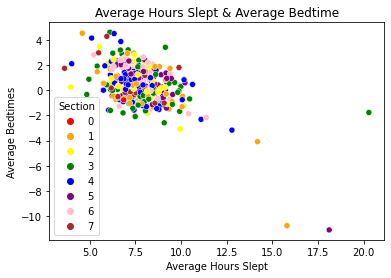

In [14]:
df_section_ = pd.read_csv("section.csv", header=None)
horizontal_stack_means = pd.concat([df_section_, total_mean, bed_mean], axis=1)
horizontal_stack_means.columns = ['Section','Total_mean', 'Bed_mean']
df = horizontal_stack_means
display(df)
sns.scatterplot(data=df, x='Total_mean', y='Bed_mean', hue='Section', 
                palette= ['red','orange','yellow','green','blue','purple','pink','brown'])     
plt.title('Average Hours Slept & Average Bedtime')
plt.xlabel('Average Hours Slept')
# Set y-axis label
plt.ylabel('Average Bedtimes')

#correlation
display(df['Total_mean'].corr(df['Bed_mean'])) #correlation between the averages of the two variables
display(np.corrcoef(df_total,df_bed)[0,1])

In [15]:
#3.) Total Hours Slept & SSI
df_total_T = df_total.T
total_mean = df_total_T.describe(include='all').loc['mean'] #average total hours slept for each individual

df_ssi_T = df_ssi.T
ssi_mean = df_ssi_T.describe(include='all').loc['mean'] #average bedtime for each individual

-0.1044048976801838

C:\Users\ggrac\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ggrac\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.5841749862628255

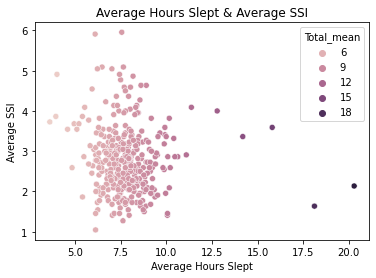

In [16]:
df_section_ = pd.read_csv("section.csv", header=None)
horizontal_stack_means = pd.concat([total_mean, ssi_mean], axis=1)
horizontal_stack_means.columns = ['Total_mean', 'SSI_mean']
df = horizontal_stack_means
# display(df)
sns.scatterplot(data=df, x='Total_mean', y='SSI_mean', hue='Total_mean')
           
plt.title('Average Hours Slept & Average SSI')
plt.xlabel('Average Hours Slept')
# Set y-axis label
plt.ylabel('Average SSI')

#correlation
display(df['Total_mean'].corr(df['SSI_mean'])) #correlation between the averages of the two variables
display(np.corrcoef(df_total,df_ssi)[0,1])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a301d4e1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a301d54d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a301d47fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a301d5a730>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a301de1e50>,
 'means': [<matplotlib.lines.Line2D at 0x1a301d3c670>,
  <matplotlib.lines.Line2D at 0x1a300f719d0>]}

Text(0, 0.5, 'Hours')

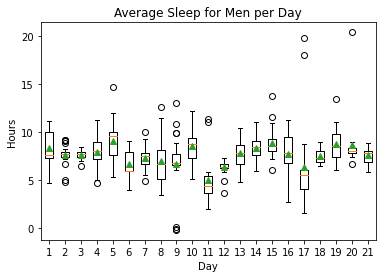

In [17]:
# 4.) BOXPLOT OF GENDER
df = pd.concat([df_gender, df_totalhoursslept])
a = df.T
df_men = a.loc[a['gender']=='male']
df_men = df_men.T
df_men = df_men.iloc[1: , :]
display(plt.boxplot(df_men.iloc[: , 1:22], showmeans=True))
plt.title('Average Sleep for Men per Day')
plt.xlabel('Day')
plt.ylabel('Hours')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a301ffaf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a30200a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a301ffaca0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a30200aaf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3020170d0>,
 'means': [<matplotlib.lines.Line2D at 0x1a30200adc0>,
  <matplotlib.lines.Line2D at 0x1a302af3760>]}

Text(0, 0.5, 'Hours')

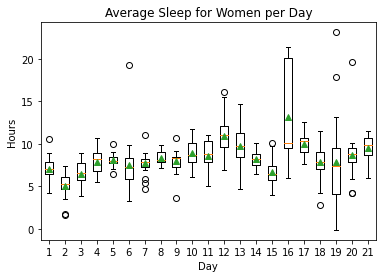

In [18]:
df = pd.concat([df_gender, df_totalhoursslept])
a = df.T
df_women = a.loc[a['gender']=='female']
df_women = df_women.T
df_women = df_women.iloc[1: , :]
display(plt.boxplot(df_women.iloc[: , 1:22], showmeans=True))
plt.title('Average Sleep for Women per Day')
plt.xlabel('Day')
plt.ylabel('Hours')

In [58]:
#5.) DIFFERENCE IN SLEEP PATTERNS BY SECTION
# AVERAGE BY SECTION
df_wake_grouped = df_wake.groupby('sections').mean()
df_wake_grouped.mean(axis=1)
df_wake_grouped_T = df_wake_grouped.T
sections_wake_mean = df_wake_grouped_T.describe(include='all').loc['mean'] #average wakeup time for each SECTION

df_bed_grouped = df_bed.groupby('sections').mean()
df_bed_grouped.mean(axis=1)
df_bed_grouped_T = df_bed_grouped.T
sections_bed_mean = df_bed_grouped_T.describe(include='all').loc['mean'] #average bedtime time for each SECTION

df_hoursinbed_grouped = df_hoursinbed.groupby('sections').mean()
df_hoursinbed_grouped.mean(axis=1)
df_hoursinbed_grouped_T = df_hoursinbed_grouped.T
sections_hoursinbed_mean = df_hoursinbed_grouped_T.describe(include='all').loc['mean'] #average hours in bed for each SECTION

df_nap_grouped = df_nap.groupby('sections').mean()
df_nap_grouped.mean(axis=1)
df_nap_grouped_T = df_nap_grouped.T
sections_nap_mean = df_nap_grouped_T.describe(include='all').loc['mean'] #average minutes napped for each SECTION

df_awake_grouped = df_awake.groupby('sections').mean()
df_awake_grouped.mean(axis=1)
df_awake_grouped_T = df_awake_grouped.T
sections_awake_mean = df_awake_grouped_T.describe(include='all').loc['mean'] #average minutes awake during the night for each SECTION

df_total_grouped = df_total.groupby('sections').mean()
df_total_grouped.mean(axis=1)
df_total_grouped_T = df_total_grouped.T
sections_total_mean = df_total_grouped_T.describe(include='all').loc['mean'] #average total hours slept for each SECTION

df_ssi_grouped = df_ssi.groupby('sections').mean()
df_ssi_grouped.mean(axis=1)
df_ssi_grouped_T = df_ssi_grouped.T
sections_ssi_mean = df_ssi_grouped_T.describe(include='all').loc['mean'] #average SSI for each SECTION

In [59]:
from scipy import stats
a = sections_wake_mean
b = sections_bed_mean
c = sections_hoursinbed_mean
d = sections_nap_mean
e = sections_awake_mean
f = sections_total_mean
g = sections_ssi_mean


display(stats.ttest_ind(a, b, trim=0)) #wake-up and bed times

display(stats.ttest_ind(e, b, trim=0)) #minutes awake and bedtimes

display(stats.ttest_ind(a, g, trim=0)) #wake-up time and SSI

display(stats.ttest_ind(b, g, trim=0)) #bedtime and SSI

display(stats.ttest_ind(d, g, trim=0)) #minutes napped and SSI

display(stats.ttest_ind(e, g, trim=0)) #minutes awake and SSI

display(stats.ttest_ind(f, g, trim=0)) #total hours slept and SSI

display(stats.ttest_ind(b, f, trim=0)) #bed times and total hours slept

display(stats.ttest_ind(d, f, trim=0)) #minutes napped and total hours slept

display(stats.ttest_ind(a, d, trim=0)) #wake up times and minutes napped

Ttest_indResult(statistic=25.461185279254256, pvalue=3.988633379100712e-13)

Ttest_indResult(statistic=9.365029944100293, pvalue=2.0920907895009057e-07)

Ttest_indResult(statistic=20.159448458396835, pvalue=9.655706255696567e-12)

Ttest_indResult(statistic=-14.43617307424353, pvalue=8.440128528802483e-10)

Ttest_indResult(statistic=7.543522474282239, pvalue=2.6952112179683878e-06)

Ttest_indResult(statistic=5.579945214309933, pvalue=6.783826878313932e-05)

Ttest_indResult(statistic=34.84787980331234, pvalue=5.258769326594672e-15)

Ttest_indResult(statistic=-35.66560327045598, pvalue=3.8135727213736416e-15)

Ttest_indResult(statistic=3.909526332044765, pvalue=0.0015720067411384934)

Ttest_indResult(statistic=-3.622597677227556, pvalue=0.0027714175928469434)

In [1]:
# AVERAGE BY INDIVIDUALS
df_wake_T = df_wake.T
wake_mean = df_wake_T.describe(include='all').loc['mean'] #average wake up times for each individual

df_bed_T = df_bed.T
bed_mean = df_bed_T.describe(include='all').loc['mean'] #average bedtime for each individual

df_hoursinbed_T = df_hoursinbed.T
hoursinbed_mean = df_hoursinbed_T.describe(include='all').loc['mean'] #average hours in bed for each individual

df_nap_T = df_nap_.T
nap_mean = df_nap_T.describe(include='all').loc['mean'] #average minutes napped for each individual

df_awake_T = df_awake.T
awake_mean = df_awake_T.describe(include='all').loc['mean'] #average minutes spent awake during the night for each individual

df_total_T = df_total.T
total_mean = df_total_T.describe(include='all').loc['mean'] #average total hours slept for each individual

df_ssi_T = df_ssi.T
ssi_mean = df_ssi_T.describe(include='all').loc['mean'] #average ssi for each individual

NameError: name 'df_wake' is not defined